In [61]:
import numpy as np

# For reading netcdf files
import xarray as xr
# Gets EOFs
from eofs.xarray import Eof

# Plotting libraries
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%config InlineBackend.figure_format='retina'

In [24]:
# Opening data
dataset = xr.open_dataset('./processed_data/processed_data.nc')

In [25]:
dataset

<xarray.Dataset> Size: 153MB
Dimensions:  (time: 15336, lat: 24, lon: 104, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 123kB 1982-01-03T12:00:00 ... 2023-12-29T1...
  * lat      (lat) float64 192B -30.0 -27.5 -25.0 -22.5 ... 20.0 22.5 25.0 27.5
  * lon      (lon) float64 832B 30.0 32.5 35.0 37.5 ... 280.0 282.5 285.0 287.5
Dimensions without coordinates: zlev
Data variables:
    anom     (time, zlev, lat, lon) float32 153MB ...

In [49]:
# Creating Eof solver
solver = Eof(dataset['anom'].isel(zlev=0))
# Getting eofs
eofs = solver.eofs()
# Getting eof eigenvals
eigs = solver.eigenvalues()
# Getting pcs
pcs = solver.pcs()

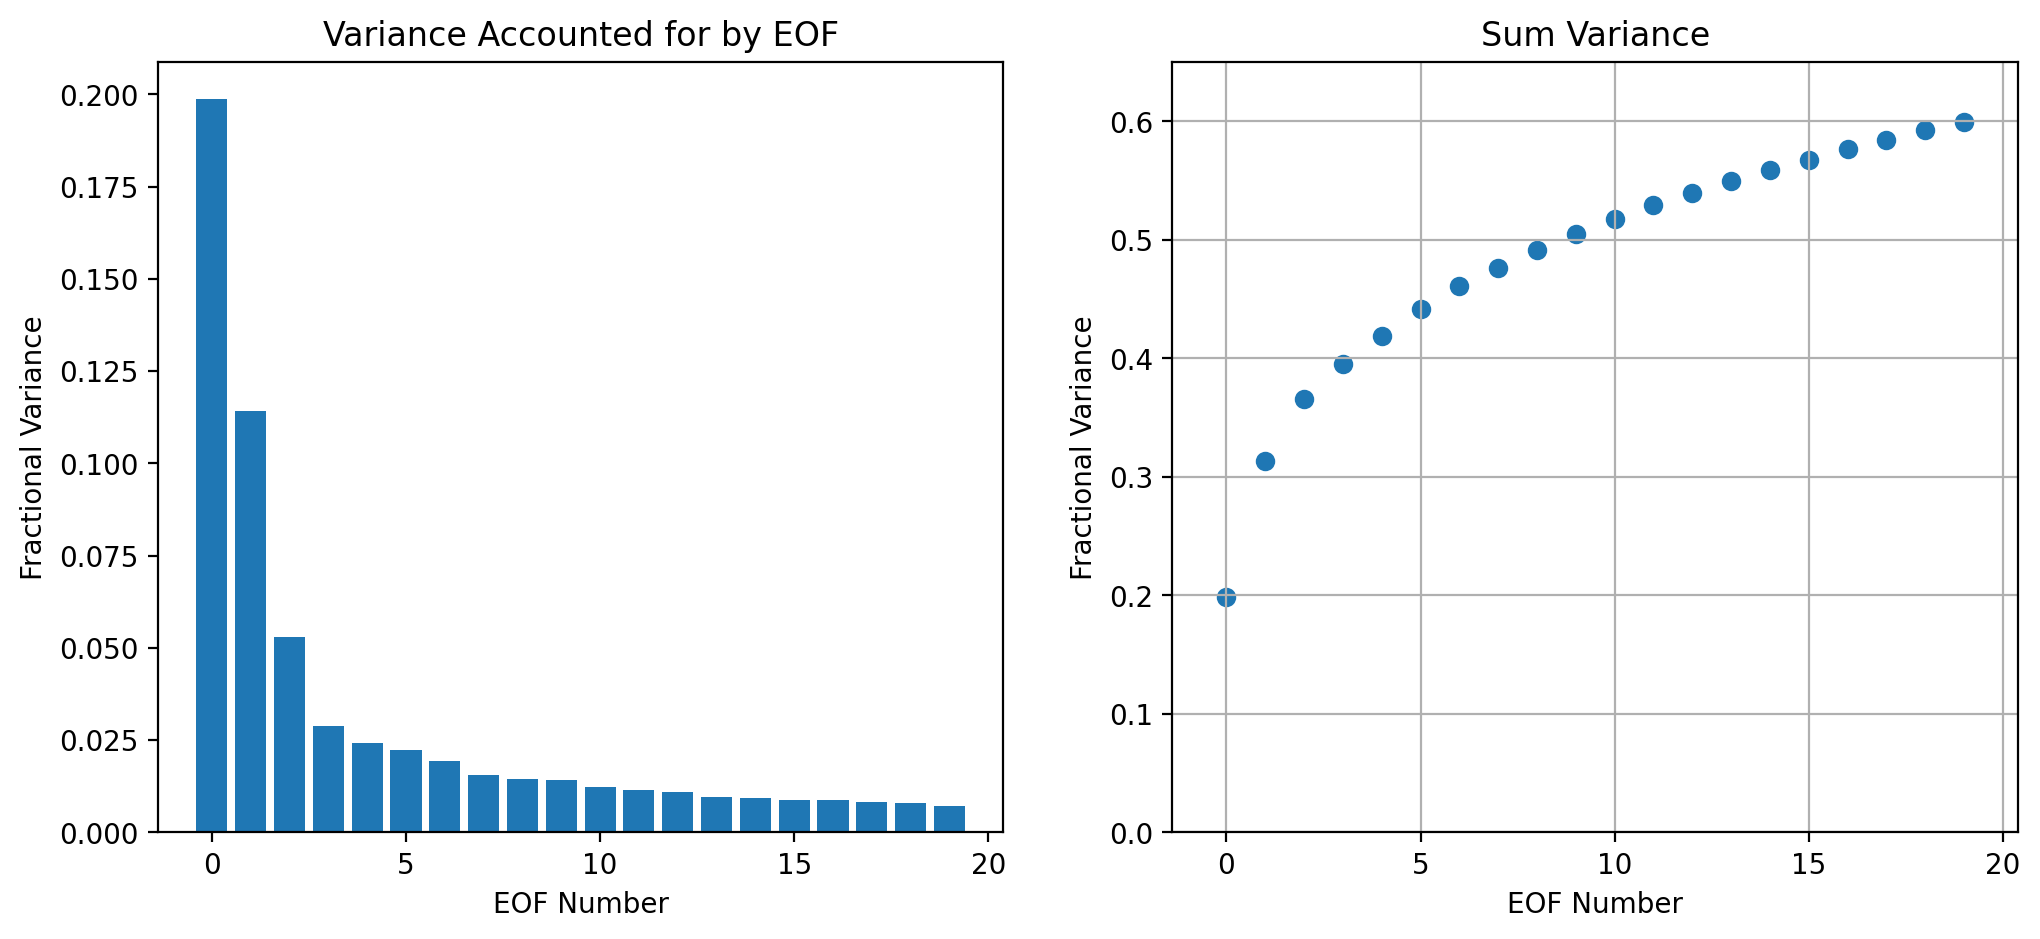

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Number of eofs to plot
num_eofs = 20
# Calculating the variance from each eof
variance = eigs[0:num_eofs]/eigs.sum()
# Calculating the sum of variance for first n eofs
sum_var = np.zeros(variance.shape)
sum_var[0] = variance[0]
# Summing
for i in range(1, len(variance)):
    sum_var[i] = sum_var[i-1] + variance[i]
# Plotting
ax1.bar(np.arange(num_eofs), variance)
ax2.scatter(np.arange(num_eofs), sum_var)

# Formatting params
ax1.set_title('Variance Accounted for by EOF')
ax1.set_xlabel('EOF Number')
ax1.set_ylabel('Fractional Variance')
ax1.set_xticks(np.arange(0, num_eofs+1, 5))

ax2.set_ylim([0, max(sum_var + 0.05)])
ax2.set_title('Sum Variance')
ax2.set_xlabel('EOF Number')
ax2.set_ylabel('Fractional Variance')
ax2.grid()

plt.show()

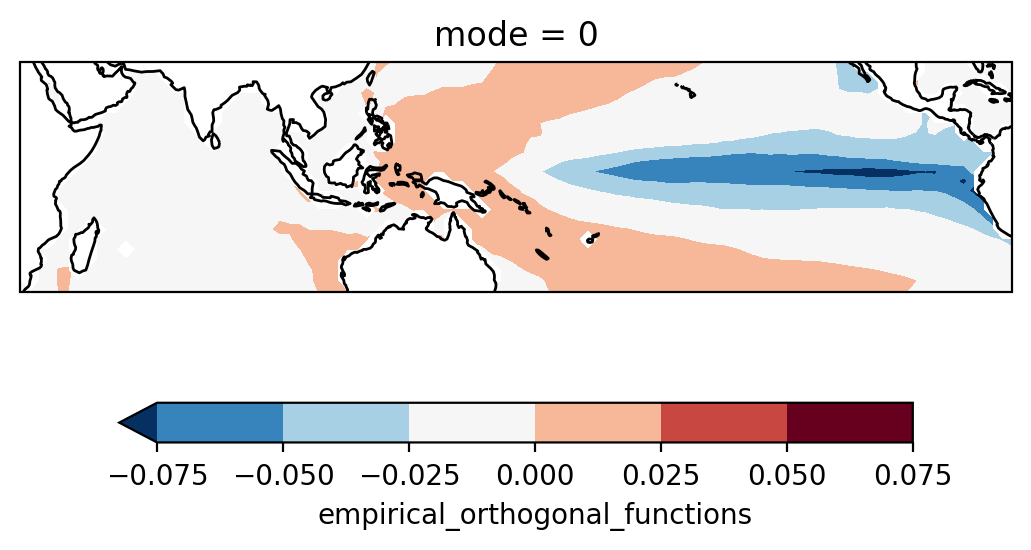

In [96]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=160, min_latitude=-45, max_latitude=45)))

eofs.isel(mode=0).plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),  # this is important!
    # usual xarray stuff
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.8},
    robust=True,
)
ax.coastlines()

plt.show()